In [83]:
library(ggplot2)
library(ggthemes)
library(ggrepel)
library(tidyverse)

In [84]:
source("../scripts/util.R")

In [85]:
# table <- read.table(
#     'deseq2_counts_log2_tpm.txt',header=T
# )

# table %>% 
#     select(gene_name,log2FoldChange,pvalue) -> res 
# # %>% column_to_rownames('gene_name') 

In [86]:
ncu = read.table(
    '../DAC-rg3039/RNA-seq/deseq2_norm.txt', sep="\t"#, col.names=TRUE
)

In [87]:
# meta 
conds  <- factor(c(
    rep('Combination',2),rep('Decitabine',2),rep('DMSO',2),rep('rg3039',2)
), levels = c('DMSO','Decitabine','rg3039','Combination'))

reps <- factor(c(
    rep(c('rep1','rep2'),4)
),c('rep1','rep2'))

colData <- data.frame(
    cond=conds,
    reps=reps,
    row.names=ncu %>% dplyr::select(-c('gene_id','gene_name')) %>% colnames,
    stringsAsFactors=FALSE
)
colData

,cond,reps
,<fct>,<fct>
hl60_combination_1,Combination,rep1
hl60_combination_2,Combination,rep2
hl60_decitabine_1,Decitabine,rep1
hl60_decitabine_2,Decitabine,rep2
hl60_dmso_1,DMSO,rep1
hl60_dmso_2,DMSO,rep2
hl60_rg3039_1,rg3039,rep1
hl60_rg3039_2,rg3039,rep2


In [88]:
library(RColorBrewer)
library(pheatmap)

heat_colors <- brewer.pal(n = 6, name = "RdYlBu") %>% rev
paired <- brewer.pal(n = 10, name = "Paired")

In [89]:
ann_colors = list(
    cond = c('DMSO'= paired[1], 'Decitabine'=paired[3], 'rg3039'=paired[9],'Combination'=paired[10])
)

# 

In [90]:
library(ggplot2)

library(tidyverse)

In [91]:
library(patchwork)

In [92]:
df = read.table(
    'delta_exp_log2FoldChange_table.txt',sep='\t',header = T
) %>% 
    data.frame %>% 
    dplyr::select(-c('gene_name')) %>% 
    column_to_rownames('gene_id') %>% 
    drop_na()

### Correlation matrix

In [93]:
library(Hmisc)
library(corrplot)
library(pheatmap)
library(ggcorrplot)

In [94]:
corr <- rcorr(as.matrix(df))

In [95]:
corr_df = corr$r[c('decitabine.rg3039','rg3039','decitabine'),] %>%
    data.frame %>%
    select(-c('decitabine.rg3039','decitabine','rg3039'))

In [96]:
corr_pv = corr$P[c('decitabine.rg3039','rg3039','decitabine'),] %>%
    data.frame %>%
    select(-c('decitabine.rg3039','decitabine','rg3039'))

In [97]:
# -log10(corr_pv)

In [98]:
colors=c("#386cb0","white","#fdb462")

In [113]:
corr_df %>% max

[1] 0.1070517

In [130]:
plot_PCC_mat <- function(corr_df){
    ggcorrplot(
        corr_df,
        method = c("square", "circle"),
        hc.order = FALSE,
        # type = "upper", 
        p.mat = corr$p,

    # ) + ggtitle(
    #     "Differential RNA Expression\nCorrelation matrix"
    ) + ggplot2::scale_fill_gradient2(
        low = colors[1], high = colors[3], mid = colors[2], 
        midpoint = .0, limit = c(-.05, 0.11), space = "Lab"
    ) + theme(
        # plot.title = element_text(
        #     # face = "bold",
        #     size = rel(1.5), hjust = 0.5),
        panel.background = element_blank(), 
        panel.border = element_blank(), 
        panel.grid.major = element_line(colour = "white"), 
        legend.title = element_blank(),
        # legend.position="bottom"
    )
}

In [131]:
p1 = plot_PCC_mat(
    corr_df[,grepl("Macrophage", colnames(corr_df))]
)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



In [132]:
p2 = plot_PCC_mat(
    corr_df[,grepl("Monocyte", colnames(corr_df))]
)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



In [133]:
p3 = plot_PCC_mat(
    corr_df[,grepl("Neutrophil", colnames(corr_df))]
)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



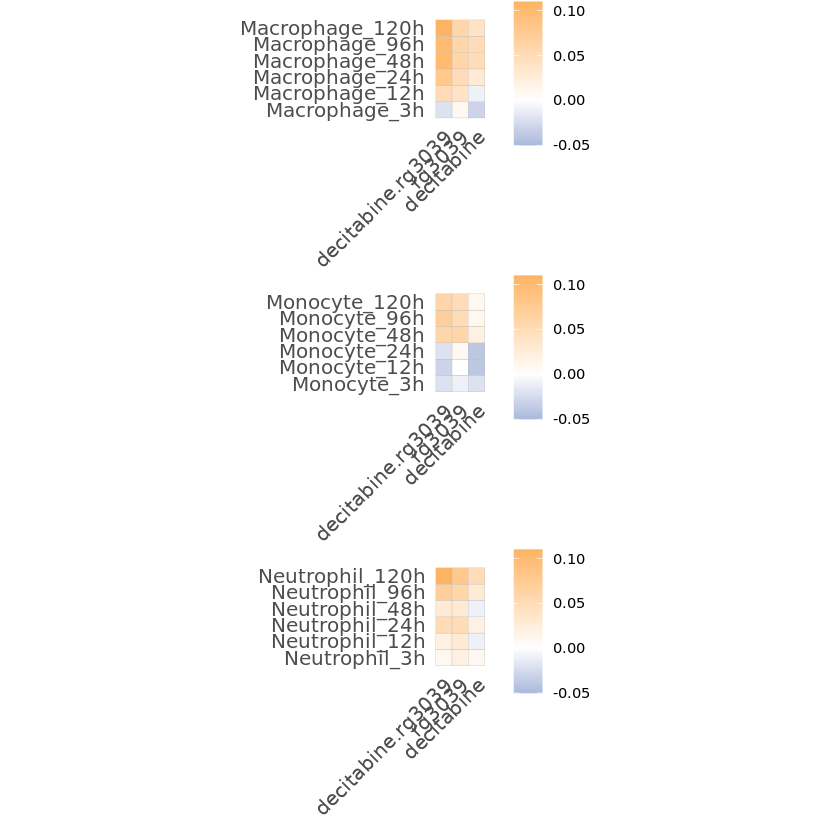

In [134]:
p1/p2/p3

In [135]:
ggsave(
    'differentiation_logFC_corr.pdf',
    p1/p2/p3,
    width = 4, height = 12)

___

In [76]:
library(reshape2)

In [77]:
plot_pcc_bar <- function(d){
    b = d %>%
        ggplot(aes(x=treatment, y=value,fill=variable)) +
        geom_bar(stat="identity",position=position_dodge()) +
        scale_fill_brewer(palette="Greens") + 
        ylab('PCC')+
        xlab('')+
        theme_minimal() + 
        theme(
            plot.title = element_text(
                # face = "bold",
                size = rel(1.5), hjust = 0.5),
            panel.background = element_blank(), 
            panel.border = element_blank(), 
            panel.grid.major = element_line(colour = "white"), 
            legend.title = element_blank(),
            axis.text.x = element_text(angle = 30, vjust = 0.5, hjust=1)
            # legend.position="bottom"
        )
}

In [78]:
b1 = melt(corr_df %>% rownames_to_column('treatment'), id='treatment') %>%
    dplyr::filter(grepl('Macrophage', variable)) %>%
    mutate(treatment=factor(treatment,levels=c('decitabine','rg3039','decitabine.rg3039'))) %>%
    plot_pcc_bar

In [79]:
b2 = melt(corr_df %>% rownames_to_column('treatment'), id='treatment') %>%
    dplyr::filter(grepl('Monocyte', variable)) %>%
    mutate(treatment=factor(treatment,levels=c('decitabine','rg3039','decitabine.rg3039'))) %>%
    plot_pcc_bar

In [80]:
b3 = melt(corr_df %>% rownames_to_column('treatment'), id='treatment') %>%
    dplyr::filter(grepl('Neutrophil', variable)) %>%
    mutate(treatment=factor(treatment,levels=c('decitabine','rg3039','decitabine.rg3039'))) %>%
    plot_pcc_bar

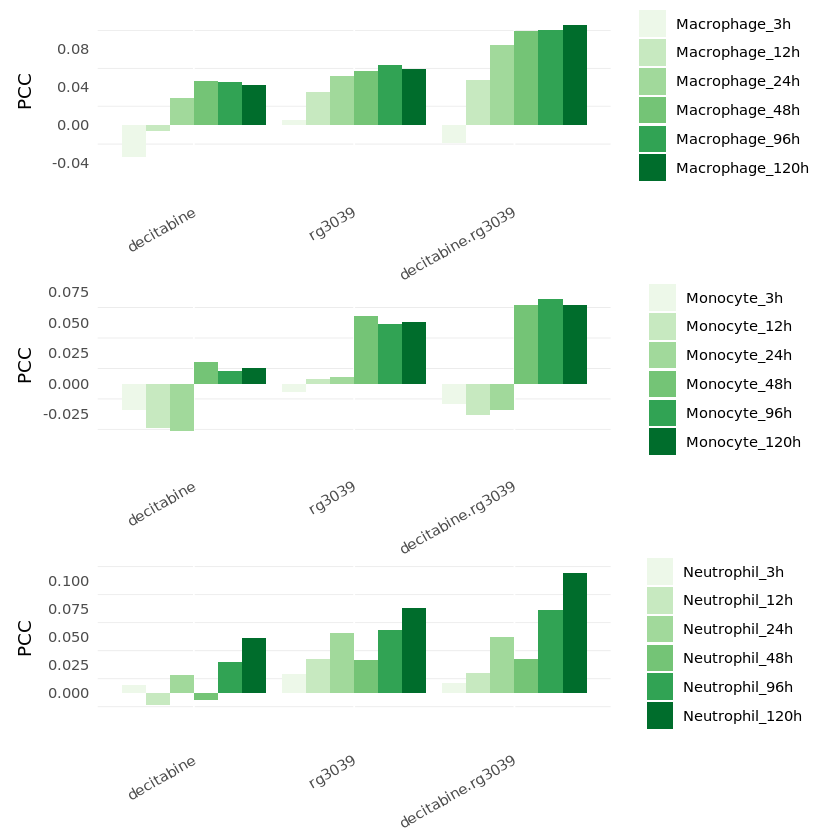

In [81]:
b1/b2/b3

In [82]:
ggsave(
    'differentiation_logFC_corr_bar.pdf',
    b1+b2+b3,
    width = 12, height = 4)

## 

In [64]:
labels = list()

In [65]:
# labels[['Neutrophil_up_regulated']] = c()

___

In [14]:
# geneset_name = 'Neutrophil_up_regulated'

In [15]:
# mat <- ncu[
#     # subset to selected genes 
#     ncu$gene_name %in% labels[[geneset_name]], 
#     # subset normalized counts
#     c('gene_name',colData %>% arrange(cond) %>% rownames)
# ] %>%  remove_rownames %>% column_to_rownames('gene_name')

In [16]:
# mat %>%
#     # generate heatmap
#     pheatmap(
#         color = heat_colors, 
#         show_colnames = F,
#         show_rownames = T,
#         # cutree_rows = 2,
#         main = geneset_name,
#         annotation = colData %>% arrange(cond) %>% select(cond),
#         cluster_cols = F, 
#         cellheight=10,
#         scale = 'row',
#         angle_col= 45,
#         annotation_colors = ann_colors
# ) -> hm

# # https://stackoverflow.com/questions/43051525/how-to-draw-pheatmap-plot-to-screen-and-also-save-to-file
# pdf(paste0('plots/heatmap_clustering_',geneset_name,'.pdf'), width=4.5, height=6)
# grid::grid.newpage()
# grid::grid.draw(hm$gtable)
# dev.off()

### 

In [67]:
# p1 = df %>%
#     ggplot(aes(y=comb_vs_dmso, x=Macrophage_vs_HL_60)) +
#     geom_point(size=1,alpha=.1,color='gray10') +
#     geom_smooth(method=lm) +
#     ggtitle('Macrophage') + 
#     xlim(-15,15) +
#     ylim(-15,15) +
#     theme_classic() +
#     theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

# p2 = df %>%
#     ggplot(aes(y=comb_vs_dmso, x=Monocyte_vs_HL_60)) +
#     geom_point(size=1,alpha=.1,color='gray10') +
#     geom_smooth(method=lm) +
#     ggtitle('Monocyte') + 
#     xlim(-15,15) +
#     ylim(-15,15) +
#     theme_classic() +
#     theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

# p3 = df %>%
#     ggplot(aes(y=comb_vs_dmso, x=Neutrophil_vs_HL_60)) +
#     geom_point(size=1,alpha=.1,color='gray10') +
#     geom_smooth(method=lm) +
#     xlim(-15,15) +
#     ylim(-15,15) +
#     ggtitle('Neutrophil') + 
#     theme_classic() +
#     theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [68]:
# p4 = df %>%
#     ggplot(aes(y=decitabine_vs_dmso, x=Macrophage_vs_HL_60)) +
#     geom_point(size=1,alpha=.1,color='gray10') +
#     geom_smooth(method=lm) +
#     ggtitle('Macrophage') + 
#     xlim(-15,15) +
#     ylim(-15,15) +
#     theme_classic() +
#     theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

# p5 = df %>%
#     ggplot(aes(y=decitabine_vs_dmso, x=Monocyte_vs_HL_60)) +
#     geom_point(size=1,alpha=.1,color='gray10') +
#     geom_smooth(method=lm) +
#     ggtitle('Monocyte') + 
#     xlim(-15,15) +
#     ylim(-15,15) +
#     theme_classic() +
#     theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

# p6 = df %>%
#     ggplot(aes(y=decitabine_vs_dmso, x=Neutrophil_vs_HL_60)) +
#     geom_point(size=1,alpha=.1,color='gray10') +
#     geom_smooth(method=lm) +
#     ggtitle('Neutrophil') + 
#     xlim(-15,15) +
#     ylim(-15,15) +
#     theme_classic() +
#     theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [69]:
# p7 = df %>%
#     ggplot(aes(y=rg3039_vs_dmso, x=Macrophage_vs_HL_60)) +
#     geom_point(size=1,alpha=.1,color='gray10') +
#     geom_smooth(method=lm) +
#     ggtitle('Macrophage') + 
#     xlim(-15,15) +
#     ylim(-15,15) +
#     theme_classic() +
#     theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

# p8 = df %>%
#     ggplot(aes(y=rg3039_vs_dmso, x=Monocyte_vs_HL_60)) +
#     geom_point(size=1,alpha=.1,color='gray10') +
#     geom_smooth(method=lm) +
#     ggtitle('Monocyte') + 
#     xlim(-15,15) +
#     ylim(-15,15) +
#     theme_classic() +
#     theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

# p9 = df %>%
#     ggplot(aes(y=rg3039_vs_dmso, x=Neutrophil_vs_HL_60)) +
#     geom_point(size=1,alpha=.1,color='gray10') +
#     geom_smooth(method=lm) +
#     ggtitle('Neutrophil') + 
#     xlim(-15,15) +
#     ylim(-15,15) +
#     theme_classic() +
#     theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [70]:
# ggsave("plots/differentiation_comb.pdf",
#        p1 + p2 + p3,
#        width = 12, height = 6, device = cairo_pdf)

# ggsave("plots/differentiation_decitabine.pdf",
#        p4 + p5 + p6,
#        width = 12, height = 6, device = cairo_pdf)

# ggsave("plots/differentiation_rg3039.pdf",
#        p7 + p8 + p9,
#        width = 12, height = 6, device = cairo_pdf)

# 

In [231]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data_gilbert/home/aarab/anaconda3/envs/deseq2/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] reshape2_1.4.4     ggcorrplot_0.1.3   corrplot_0.92      Hmisc_4.6-0       
 [5] Formula_1.2-4      survival_3.2-13    lattice_0.20-45    patchwork_1.1.1   
 [9] pheatmap_1.0.12    RColorBrewer_1.1-2 forcats_0.5.1      stringr_1.4.0     
[13] dplyr_1.0.7        purrr_0.3.4        read

In [232]:
date()

[1] "Mon Mar 18 03:01:46 2024"